In [1]:
import sys
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline



from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import callbacks



os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
start = time.time()
train_data_path = "/Users/yusufsatilmis/Desktop/Dataset/Bitirme/train/"
validation_data_path = "/Users/yusufsatilmis/Desktop/Dataset/Bitirme/test/"
save_dir='./result'

epochs = 10
batch_size = 64
samples_per_epoch = 1000
validation_steps = 300
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
lr = 0.0004

IMG_SIZE = 150

img_width, img_height = IMG_SIZE, IMG_SIZE
classes_num = 10

In [3]:
def model_1():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height,3)))
    model.add(Activation('relu'))
    BatchNormalization(axis=-1)
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    BatchNormalization(axis=-1)
    model.add(Conv2D(64,(3, 3)))
    model.add(Activation('relu'))
    BatchNormalization(axis=-1)
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    # Fully connected layer

    BatchNormalization()
    model.add(Dense(512))
    model.add(Activation('relu'))
    BatchNormalization()
    model.add(Dropout(0.2))
    model.add(Dense(classes_num))

    # model.add(Convolution2D(10,3,3, border_mode='same'))
    # model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [4]:
def model_2():
    model = Sequential() 
    model.add(Conv2D(32, (2, 2), input_shape = (img_width, img_height,3))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 

    model.add(Conv2D(32, (2, 2))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 

    model.add(Conv2D(64, (2, 2))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 

    model.add(Flatten()) 
    model.add(Dense(64)) 
    model.add(Activation('relu')) 
    model.add(Dropout(0.5)) 
    model.add(Dense(classes_num)) 
    model.add(Activation('sigmoid')) 

    model.compile(loss ='binary_crossentropy', optimizer ='rmsprop', metrics =['accuracy']) 
    return model

In [5]:
def model_3():
    model = Sequential()
    model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, border_mode ="same", input_shape=(img_width, img_height, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

    model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, border_mode ="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size), dim_ordering='th'))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(classes_num, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=lr), metrics=['accuracy'])
    return model


In [6]:
def model_4():    
    model = Sequential()
    model.add(
        Convolution2D(

            filters=32,
            kernel_size=(5, 5),
            padding='same',
            dim_ordering='tf',
            input_shape = (img_width, img_height,3))) 
    
    
    model.add( BatchNormalization())

    model.add(Activation('relu'))
    model.add(
        MaxPooling2D(
            pool_size=(2, 2),
            strides=(2, 2), 
            padding='same'
        )
    )


    model.add(Convolution2D(filters=64, kernel_size=(5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Dropout(0.15))


    model.add(Convolution2D(filters=64, kernel_size=(5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Dropout(0.15))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(classes_num))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    
    model.compile(
            optimizer='adadelta',  
            loss='squared_hinge', 
            metrics=['accuracy'])
    return model
    

In [7]:
model = model_3()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 37, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 88800)             0         
__________

/anaconda2/envs/deeplearning2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(150, 150,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/envs/deeplearning2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same")`
  import sys
/anaconda2/envs/deeplearning2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
  if __name__ == '__main__':


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [9]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1707 images belonging to 10 classes.
Found 570 images belonging to 10 classes.


In [10]:
"""
Tensorboard log
"""
log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

In [11]:
number_of_train_samples = 1707
number_of_val_samples =  570

In [12]:
'''
history = model.fit_generator(
    train_generator,
    samples_per_epoch=samples_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=cbks,
    validation_steps=validation_steps)
'''

'\nhistory = model.fit_generator(\n    train_generator,\n    samples_per_epoch=samples_per_epoch,\n    epochs=epochs,\n    validation_data=validation_generator,\n    callbacks=cbks,\n    validation_steps=validation_steps)\n'

In [13]:
# https://datascience.stackexchange.com/questions/29719/how-to-set-batch-size-steps-per-epoch-and-validation-steps

history = model.fit_generator(train_generator,
                    steps_per_epoch= number_of_train_samples / batch_size,
                    epochs=epochs, 
                    callbacks=cbks,
                    validation_data=validation_generator,
                    validation_steps=number_of_val_samples / batch_size)

Epoch 1/10
26/26 [==============================] - 42s 2s/step - loss: 2.1948 - acc: 0.3840 - val_loss: 1.1025 - val_acc: 0.6367
Epoch 2/10
26/26 [==============================] - 38s 1s/step - loss: 0.8401 - acc: 0.7408 - val_loss: 0.7135 - val_acc: 0.7549
Epoch 3/10
26/26 [==============================] - 38s 1s/step - loss: 0.4644 - acc: 0.8805 - val_loss: 0.3266 - val_acc: 0.9190
Epoch 4/10
26/26 [==============================] - 38s 1s/step - loss: 0.2466 - acc: 0.9393 - val_loss: 0.1829 - val_acc: 0.9802
Epoch 5/10
26/26 [==============================] - 38s 1s/step - loss: 0.1431 - acc: 0.9660 - val_loss: 0.0993 - val_acc: 0.9763
Epoch 6/10
26/26 [==============================] - 38s 1s/step - loss: 0.0834 - acc: 0.9856 - val_loss: 0.0861 - val_acc: 0.9704
Epoch 7/10
26/26 [==============================] - 38s 1s/step - loss: 0.0525 - acc: 0.9910 - val_loss: 0.0585 - val_acc: 0.9862
Epoch 8/10
26/26 [==============================] - 38s 1s/step - loss: 0.0290 - acc: 0.99

In [14]:
end = time.time()
dur = end-start

if dur<60:
    print("Execution Time:",dur,"seconds")
elif dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time:",dur,"minutes")
else:
    dur=dur/(60*60)
    print("Execution Time:",dur,"hours")


('Execution Time:', 6.513114134470622, 'minutes')


In [15]:
#score = model.evaluate(X_test, Y_test)
#print
#print('Test accuracy: ', score[1])

In [16]:
model.save_weights(save_dir+"/model.h5")
model_json = model.to_json()
with open(save_dir+"/model_json.json", "w") as json_file:
    json_file.write(model_json)

['acc', 'loss', 'val_acc', 'val_loss']


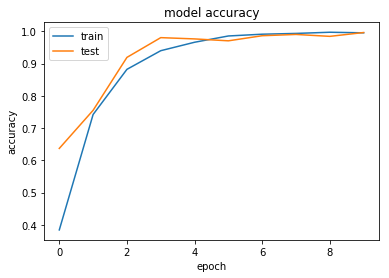

In [17]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

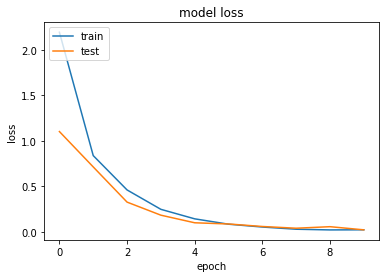

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Tahmin edilen Sonuc ==> 8


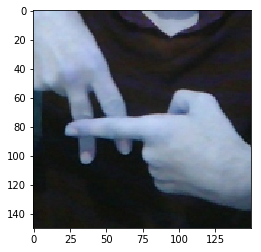

In [19]:
image = cv2.imread("/Users/yusufsatilmis/Desktop/Dataset/bitirme/data/0/a_0_2.jpg")
x1, y1, x2, y2 = 201, 251, 440, 480
image = image[y1:y2, x1:x2]
image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))

#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#test = np.array( image ).reshape(-1, IMG_SIZE, IMG_SIZE, 3).astype('float32') / 255.
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
pred = model.predict(image)
print "Tahmin edilen Sonuc ==> " +str(np.argmax(pred[0]))

Tahmin edilen Sonuc ==> 8


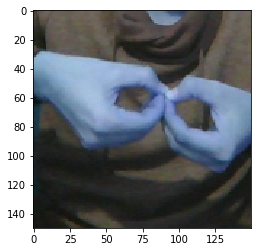

In [20]:
image = cv2.imread("/Users/yusufsatilmis/Desktop/Dataset/bitirme/data/1/b_0_2.jpg")
x1, y1, x2, y2 = 201, 251, 440, 480
image = image[y1:y2, x1:x2]
image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))

#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#test = np.array( image ).reshape(-1, IMG_SIZE, IMG_SIZE, 3).astype('float32') / 255.
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
pred = model.predict(image)
print "Tahmin edilen Sonuc ==> " +str(np.argmax(pred[0]))

Tahmin edilen Sonuc ==> 2


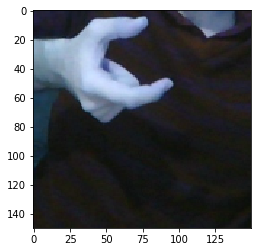

In [21]:
image = cv2.imread("/Users/yusufsatilmis/Desktop/Dataset/Bitirme/data/2/c_0_59.jpg")
x1, y1, x2, y2 = 201, 251, 440, 480
image = image[y1:y2, x1:x2]
image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))

#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#test = np.array( image ).reshape(-1, IMG_SIZE, IMG_SIZE, 3).astype('float32') / 255.
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
pred = model.predict(image)
print "Tahmin edilen Sonuc ==> " +str(np.argmax(pred[0]))

Tahmin edilen Sonuc ==> 7


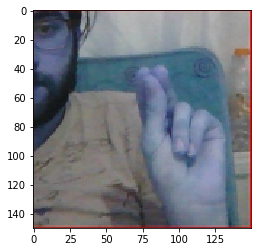

In [22]:
image = cv2.imread("/Users/yusufsatilmis/Desktop/Dataset/Bitirme_V2/data/7/7_0_59.jpg")
x1, y1, x2, y2 = 201, 251, 440, 480
image = image[y1:y2, x1:x2]
image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))

#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#test = np.array( image ).reshape(-1, IMG_SIZE, IMG_SIZE, 3).astype('float32') / 255.
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
pred = model.predict(image)
print "Tahmin edilen Sonuc ==> " +str(np.argmax(pred[0]))